## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_research = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_research.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
combined_research["Mouse ID"].nunique()


249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_research[combined_research.duplicated(["Mouse ID","Timepoint"], keep="last")]
duplicated_mouseID = duplicate["Mouse ID"].values[0]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_research = combined_research[combined_research["Mouse ID"] != duplicated_mouseID]
clean_research


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_research["Mouse ID"].nunique()

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({
    "Tumor Volume Mean/Average": mean, 
    "Tumor Volume Median": median, 
    "Tumor Volume Variance": variance, 
    "Tumor Volume Standard Deviation": std, 
    "Tumor Volume SEM": sem
})
summary_statistics


,Tumor Volume Mean/Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
combined_research.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", 'std', 'sem','var']})

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

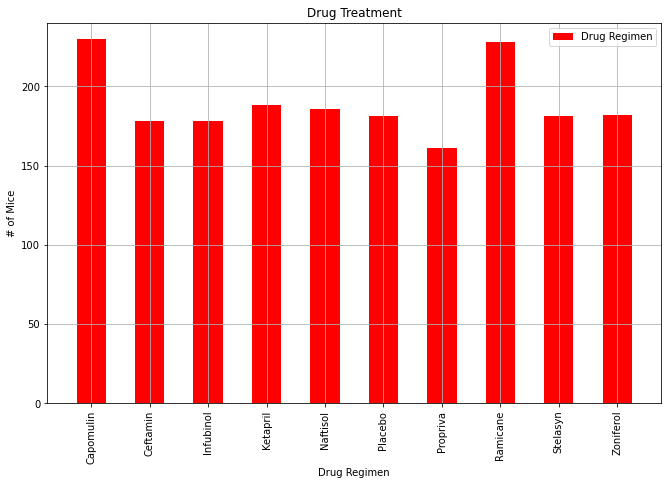

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Running groupby the 'Drug Regimen'
drug_regimen_group = combined_research.groupby("Drug Regimen")

# Counting the  data points for each drug regimen to create new DataFrame
count_of_drug_groups = pd.DataFrame(drug_regimen_group["Drug Regimen"].count())

# create bar chart to show mouse id and drug regimen
count_of_drug_groups.plot(kind="bar", facecolor="red", title="Drug Treatment", figsize=(11,7))
plt.ylabel("# of Mice")
plt.xlabel("Drug Regimen")
plt.grid()
plt.xlim(-0.75, len(count_of_drug_groups.index)-0.25)
plt.ylim(0, max( count_of_drug_groups["Drug Regimen"])+10)

plt.show()

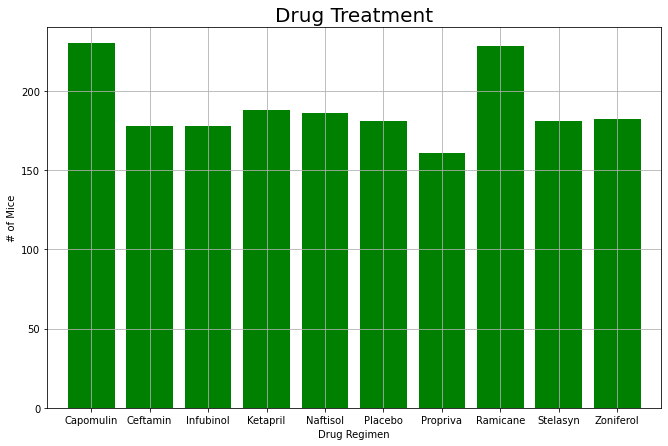

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig1, ax1 = plt.subplots(figsize=(11,7))
plt.bar(list(count_of_drug_groups.index), count_of_drug_groups["Drug Regimen"], facecolor = "green") 
plt.grid()
plt.xlim(-0.75, len(count_of_drug_groups.index)-0.25)
plt.ylim(0, max( count_of_drug_groups["Drug Regimen"])+10)
plt.title("Drug Treatment",fontsize = 20)
plt.ylabel("# of Mice")
plt.xlabel("Drug Regimen")

plt.show()


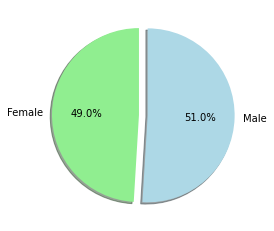

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_research.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex", "Mouse ID"]]

colors = ["lightgreen", "lightblue"]
explode = (0, 0.1)

labels = gender_data["Sex"]
sizes = gender_data["Mouse ID"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis = ("equal")
plt.show()



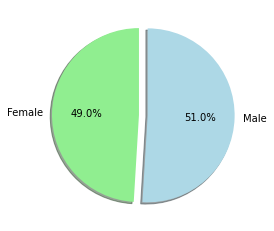

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis = ("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint= combined_research.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tumor_vol_df = pd.merge(last_timepoint_df, clean_research, on=("Mouse ID","Timepoint"))
last_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
